<a href="https://colab.research.google.com/github/BillyMuthiani/Machine-Learning-projests/blob/main/Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What You're Aiming For
# we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This  will cover all the major concepts of supervised and unsupervised machine learning methods.

#Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
import uuid

In [ ]:
# Load the dataset
df = pd.read_csv('Microsoft_malware_dataset_min.csv')
df.head(31)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
5,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,97
6,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,78
7,0,0.0,0.0,Core,1,1.0,0.0,1.0,rs1,97
8,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,164
9,1,1.0,0.0,CoreSingleLanguage,1,1.0,0.0,1.0,rs3,93


In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title='Profile report')
profile.to_file('/content/Microsoft_malware_dataset_min.csv.html')
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:02<00:00,  4.59it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("\nDataset Description:")
df.describe()


Dataset Description:


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [ ]:
# Basic data exploration
print("Dataset Info:")
df.info()

print("\nMissing Values:")
df.isnull().sum()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB

Missing Values:


,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


In [ ]:
# Handle missing and corrupted values
df = df.dropna(subset=['HasDetections'])  # Drop rows with missing target
for col in ['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Census_HasOpticalDiskDrive',
            'Firewall', 'SMode', 'IsProtected']:
    df[col] = df[col].fillna(0).astype(int)  # Fill missing binary values with 0


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Handle outliers (using z-score for CountryIdentifier)
z_scores = stats.zscore(df['CountryIdentifier'].astype(float))
df = df[(z_scores < 3) & (z_scores > -3)]

# Encode categorical features
le_os = LabelEncoder()
le_platform = LabelEncoder()
df['Census_OSEdition'] = le_os.fit_transform(df['Census_OSEdition'])
df['OsPlatformSubRelease'] = le_platform.fit_transform(df['OsPlatformSubRelease'])


In [ ]:
# Prepare dataset for modeling
X = df.drop('HasDetections', axis=1)
y = df['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Decision Tree with default parameters
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

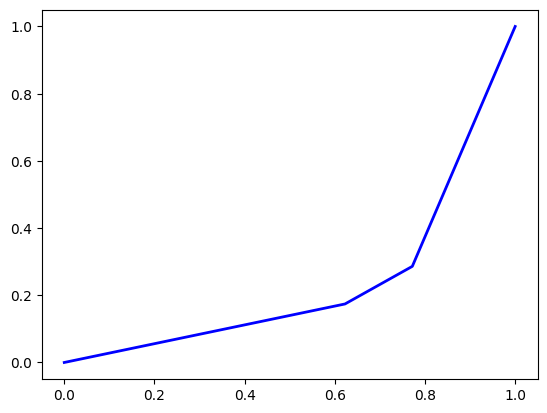

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Default DT (AUC = {roc_auc:.2f})')


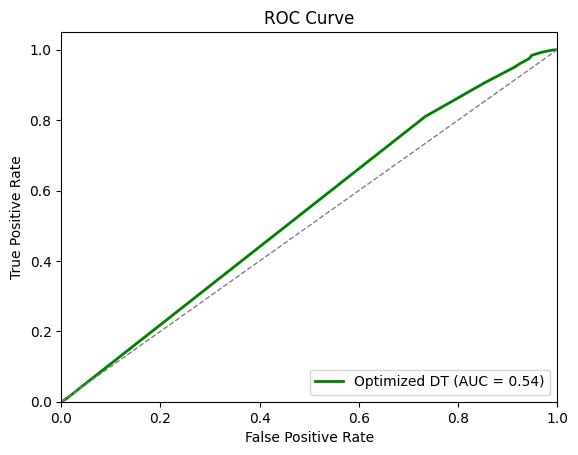

In [ ]:
# Decision Tree with optimized parameters
dt_optimized = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
dt_optimized.fit(X_train, y_train)
y_pred_proba_opt = dt_optimized.predict_proba(X_test)[:, 1]
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_opt)
roc_auc_opt = auc(fpr_opt, tpr_opt)
plt.plot(fpr_opt, tpr_opt, color='green', lw=2, label=f'Optimized DT (AUC = {roc_auc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')


In [ ]:
# Unsupervised learning: K-means clustering
X_cluster = df.drop('HasDetections', axis=1)

# Find optimal K using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)


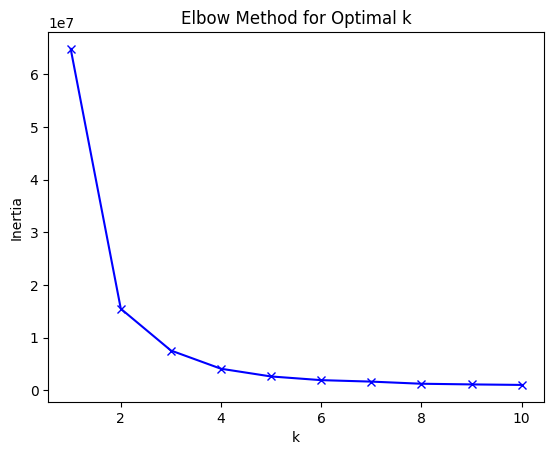

In [ ]:
# Plot elbow curve
plt.figure()
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# K-means with optimal k (assuming k=3 from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)


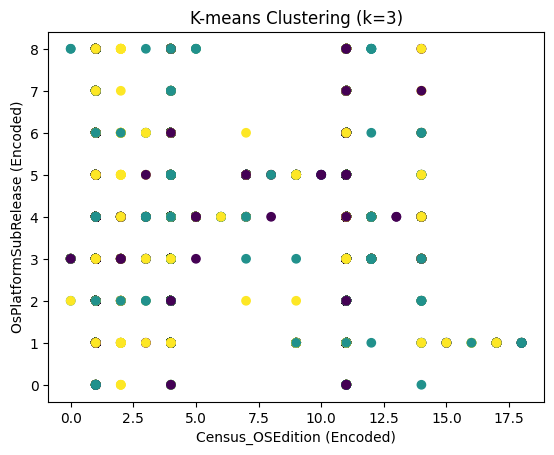


Clustering Results:
Number of clusters: 3
Cluster sizes: [4552 6560 5179]


In [ ]:
# Plot clusters (using two features for visualization)
plt.figure()
plt.scatter(X_cluster['Census_OSEdition'], X_cluster['OsPlatformSubRelease'],
            c=clusters, cmap='viridis')
plt.xlabel('Census_OSEdition (Encoded)')
plt.ylabel('OsPlatformSubRelease (Encoded)')
plt.title('K-means Clustering (k=3)')
plt.show()

# Print interpretation
print("\nClustering Results:")
print(f"Number of clusters: 3")
print(f"Cluster sizes: {np.bincount(clusters)}")

#Conclusion: Both models highlight the importance of ML features in understanding system patterns, with tuning improving supervised results and clustering revealing inherent structure.